# 🔐 AES-128 Encryption/Decryption Simulator in Python

This notebook demonstrates an **educational simulation of AES-128** encryption and decryption:

✅ Implemented fully from scratch  
✅ Visualizes internal state across all AES rounds  
✅ Supports ECB mode and padding  
✅ Cross-validated against PyCryptodome  


In [17]:
# Add 'src' directory to module search path
import sys
sys.path.append('src')

from src.ch_aes import AES
from src.ch_utils import bytes2matrix, matrix2bytes, print_state
from Crypto.Cipher import AES as PyAES
from Crypto.Util.Padding import pad, unpad
import matplotlib.pyplot as plt
import numpy as np


In [18]:
key = b'This is a key123'         # 16 bytes
plaintext = b'Two One Nine Two'   # 16 bytes

aes = AES(key)

print("🔐 Starting AES-128 Encryption (Verbose)\n")
ciphertext = aes.encrypt_block_verbose(plaintext)

print(f"\n🧾 Final Ciphertext (hex): {ciphertext.hex()}")

print("\n🔓 Starting AES-128 Decryption (Verbose)\n")
decrypted = aes.decrypt_block_verbose(ciphertext)

print(f"\n🧾 Final Decrypted Plaintext: {decrypted}")


🔐 Starting AES-128 Encryption (Verbose)


🔍 Initial Plaintext
54 4f 4e 20
77 6e 69 54
6f 65 6e 77
20 20 65 6f

🔍 Round 0 - After AddRoundKey
00 6f 2f 59
1f 07 49 65
06 16 05 45
53 00 00 5c

🔍 Round 1 - After SubBytes
63 a8 15 cb
c0 c5 3b 4d
6f 47 6b 6e
ed 63 63 4a

🔍 Round 1 - After ShiftRows
63 a8 15 cb
c5 3b 4d c0
6b 6e 6f 47
4a ed 63 63

🔍 Round 1 - After MixColumns
b3 85 f1 f2
05 81 5d fa
ae 63 23 20
9f 77 db 07

🔍 Round 1 - After AddRoundKey
21 37 22 58
4e a3 5f c9
04 ba 91 a0
5a 92 5b b4

🔍 Round 2 - After SubBytes
fd 9a 93 6a
2f 0a cf dd
f2 f4 81 e0
be 4f 39 8d

🔍 Round 2 - After ShiftRows
fd 9a 93 6a
0a cf dd 2f
81 e0 f2 f4
8d be 4f 39

🔍 Round 2 - After MixColumns
f3 3b fc 68
fc 9a 70 0a
62 57 60 fd
96 fd 1f 17

🔍 Round 2 - After AddRoundKey
a0 da ce f0
7a 3e d6 9f
a5 49 cc d1
ff 71 13 a8

🔍 Round 3 - After SubBytes
e0 57 8b 8c
da b2 f6 db
06 3b 4b 3e
16 a3 7d c2

🔍 Round 3 - After ShiftRows
e0 57 8b 8c
b2 f6 db da
4b 3e 06 3b
c2 16 a3 7d

🔍 Round 3 - After MixColumns
9f 87 de

In [19]:
pyaes = PyAES.new(key, PyAES.MODE_ECB)
ref_ciphertext = pyaes.encrypt(plaintext)
ref_plaintext = pyaes.decrypt(ref_ciphertext)

print("\n🛠️ PyCryptodome Encrypted:", ref_ciphertext.hex())
print("🛠️ PyCryptodome Decrypted:", ref_plaintext)

print("\n✅ Match Status:")
print("Encryption match:", ciphertext == ref_ciphertext)
print("Decryption match:", decrypted == plaintext)



🛠️ PyCryptodome Encrypted: 7a881802905b14a2883c02ce87955d9f
🛠️ PyCryptodome Decrypted: b'Two One Nine Two'

✅ Match Status:
Encryption match: True
Decryption match: True


## 📦 Padding Support

AES operates on 16-byte blocks. For any plaintext that isn't 16 bytes long, padding (PKCS#7) is applied using `Crypto.Util.Padding`.


In [20]:
def encrypt_full_message(aes_obj, data):
    assert len(data) % 16 == 0, "Data must be a multiple of 16 bytes."
    return b''.join(aes_obj.encrypt_block(data[i:i+16]) for i in range(0, len(data), 16))

def decrypt_full_message(aes_obj, data):
    assert len(data) % 16 == 0, "Encrypted data must be a multiple of 16 bytes."
    return b''.join(aes_obj.decrypt_block(data[i:i+16]) for i in range(0, len(data), 16))

# Example with longer text
custom_key = b'My AES key 12345'                 # 16 bytes
custom_text = b'This is longer than 16 bytes!'   # Needs padding

aes2 = AES(custom_key)

padded_text = pad(custom_text, 16)
enc = encrypt_full_message(aes2, padded_text)
dec = unpad(decrypt_full_message(aes2, enc), 16)

print(f"\n📦 Custom Plaintext: {custom_text}")
print(f"🔐 Encrypted: {enc.hex()}")
print(f"🔓 Decrypted (unpadded): {dec}")



📦 Custom Plaintext: b'This is longer than 16 bytes!'
🔐 Encrypted: 86eb155b95dd61bac2dc02adb02bedbe98cb284e5554d2cd079972c0bdd9e36e
🔓 Decrypted (unpadded): b'This is longer than 16 bytes!'


## 🔍 Internal State Visualization

Each round of AES shows the transformation of the state matrix:
- `SubBytes`
- `ShiftRows`
- `MixColumns`
- `AddRoundKey`

This helps understand how AES achieves diffusion and confusion.


In [21]:
def visualize_state(state, title="AES State"):
    print(f"\n🧩 {title}")
    for row in state:
        print(' '.join(f'{b:02x}' for b in row))


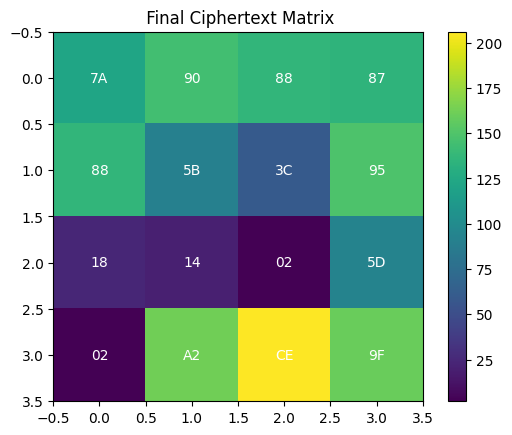

In [24]:
def visualize_matrix(matrix, title="State Matrix"):
    array = np.array(matrix)
    plt.imshow(array, cmap="viridis", interpolation="nearest")
    for i in range(4):
        for j in range(4):
            plt.text(j, i, f"{array[i, j]:02X}", ha='center', va='center', color='white', fontsize=10)
    plt.title(title)
    plt.colorbar()
    plt.show()

# Display final ciphertext state
state = bytes2matrix(ciphertext)
visualize_matrix(state, " Final Ciphertext Matrix")


In [23]:
def print_state_table(state, title="State Table"):
    print(f"\n🧩 {title}")
    print("-" * 25)
    for row in state:
        print("| " + "  ".join(f"{b:02x}" for b in row) + " |")
    print("-" * 25)

# Example usage
print_state_table(state, "Final Ciphertext Table")



🧩 Final Ciphertext Table
-------------------------
| 7a  90  88  87 |
| 88  5b  3c  95 |
| 18  14  02  5d |
| 02  a2  ce  9f |
-------------------------
